In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.decomposition import NMF, PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn import (
    cluster, decomposition, ensemble, manifold, 
    random_projection, preprocessing)
from sklearn.utils.class_weight import compute_class_weight


import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN

import itertools
import scipy.stats as scs
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from IPython.display import HTML, display

In [2]:
df = pd.read_csv('../../sample_df.csv')

In [3]:
X = df.text.values
y = df.likes.values

In [4]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', analyzer='word', strip_accents='ascii', sublinear_tf = True)
vect = vectorizer.fit_transform(X)

In [5]:
features = vectorizer.get_feature_names()
np.unique(features)

array(['000', '10', '100', '11', '12', '15', '20', '2015', '2016', '2017',
       '25', '30', '40', '50', '60', 'ability', 'able', 'abortion',
       'absolutely', 'abuse', 'accept', 'access', 'according', 'account',
       'act', 'action', 'actions', 'actual', 'actually', 'add', 'address',
       'administration', 'afford', 'age', 'agenda', 'ago', 'agree', 'air',
       'alaska', 'alaskans', 'alberta', 'allow', 'allowed', 'amendment',
       'america', 'american', 'americans', 'anchorage', 'answer', 'anti',
       'anymore', 'apparently', 'appears', 'area', 'areas', 'aren',
       'argument', 'article', 'articles', 'ask', 'asked', 'asking',
       'assault', 'assume', 'attack', 'attacks', 'attempt', 'attention',
       'author', 'available', 'average', 'avoid', 'away', 'bad', 'ban',
       'bank', 'base', 'based', 'basis', 'bc', 'behavior', 'believe',
       'benefit', 'benefits', 'best', 'bet', 'better', 'big', 'biggest',
       'billion', 'bishops', 'bit', 'black', 'blame', 'board',

# REDUCE DIMENSIONS

In [6]:
from sklearn.decomposition import TruncatedSVD
from scipy import sparse as sp


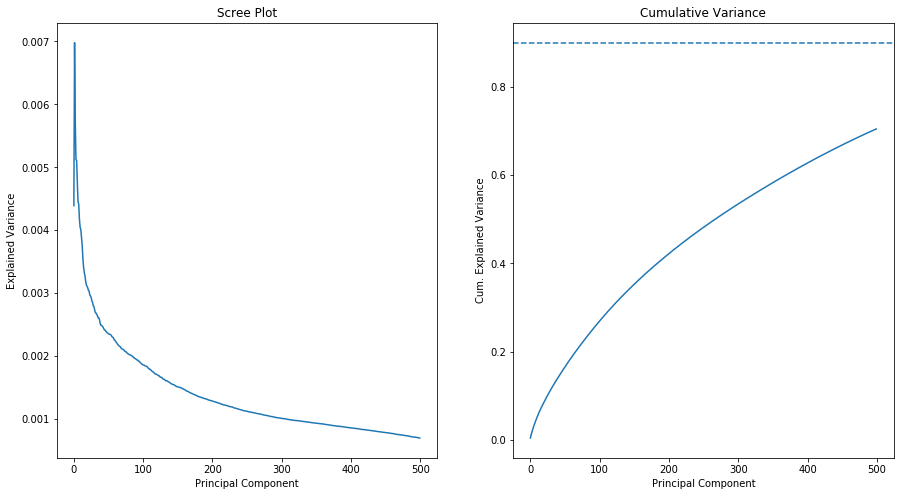

In [7]:
clf = TruncatedSVD(500)
Xpca = clf.fit_transform(vect)


fig,axs = plt.subplots(1,2, figsize=(15,8))
cut_off = 0.9
axs[0].plot(clf.explained_variance_ratio_)
axs[1].plot(np.cumsum(clf.explained_variance_ratio_))
axs[1].axhline(cut_off, 0, 100, linestyle = '--')
axs[0].set_xlabel('Principal Component')
axs[0].set_ylabel('Explained Variance')
axs[1].set_xlabel('Principal Component')
axs[1].set_ylabel('Cum. Explained Variance')
axs[0].set_title('Scree Plot')
axs[1].set_title('Cumulative Variance')
plt.savefig("pca_scree.png")

### Elbow is around 100

In [10]:
clf = TruncatedSVD(100)
Xpca = clf.fit_transform(vect)
clf.explained_variance_ratio_.sum()

0.26405459992304625

In [11]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(Xpca)

KMeans(n_clusters=2)

In [13]:
assigned_cluster = kmeans.transform(Xpca).argmin(axis=1)

In [15]:
# for i in range(kmeans.n_clusters):
#     cluster = np.arange(0, Xpca.shape[0])[assigned_cluster==i]
#     topics = df.loc[cluster]['text']
#     most_common = Counter(topics).most_common()
#     print(f"Cluster {i}:")
    
#     for j in range (len(most_common)):
#         print(f"     {most_common[j][0]} ({most_common[j][1]})")


In [16]:
kmeans.n_clusters

2

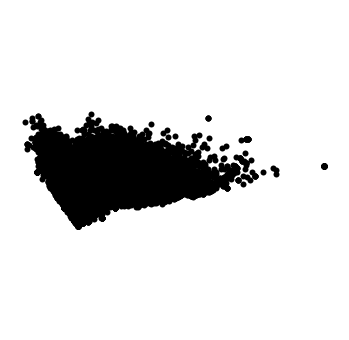

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis('off')
ax.axis('equal')
ax.scatter(Xpca[:,1], Xpca[:,0], linewidths=0, color='k')




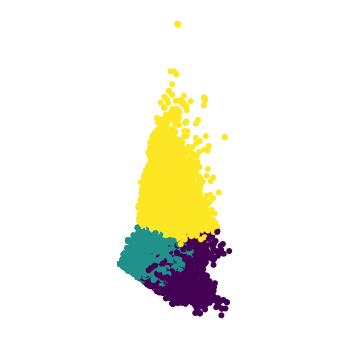

In [35]:
km = KMeans(3)
y = km.fit_predict(Xpca)


fig, ax = plt.subplots(figsize=(6,6))

ax.axis('off')
ax.axis('equal')
ax.scatter(Xpca[:,0], Xpca[:,1], c=y, linewidths=0)
plt.show()

In [39]:
maxk = 3
wcss = np.zeros(maxk)
silhouette = np.zeros(maxk)

# fig, axes = plt.subplots(3, 4, figsize=(16,9))

# # flatten
# axes = [ax for axrow in axes for ax in axrow]

for k in range(1,maxk):
    km = KMeans(k)
    y = km.fit_predict(Xpca)
#     ax.axis('off')
#     ax.scatter(Xpca[:,0], Xpca[:,1], c=y, linewidths=0, s=10    
    
    for c in range(0, k):
        for i1, i2 in itertools.combinations([ i for i in range(len(y)) if y[i] == c ], 2):
            wcss[k] += sum(Xpca[i1] - Xpca[i2])**2
    wcss[k] /= 2
    
    if k > 1:
        silhouette[k] = silhouette_score(x,y)

KeyboardInterrupt: 

Text(0, 0.5, 'within-cluster sum of squares')

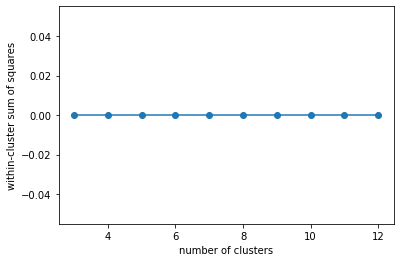

In [37]:
fig, ax = plt.subplots()
ax.plot(range(3,maxk), wcss[3:maxk], 'o-')
ax.set_xlabel("number of clusters")
ax.set_ylabel("within-cluster sum of squares")


In [ ]:
fig, ax = plt.subplots()
ax.plot(range(2,maxk), silhouette[2:maxk], 'o-')
ax.set_xlabel("number of clusters")
ax.set_ylabel("silhouette score")

